In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("supply_chain_data.csv")

df.head()


,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product type             100 non-null    object 
 1   SKU                      100 non-null    object 
 2   Price                    100 non-null    float64
 3   Availability             100 non-null    int64  
 4   Number of products sold  100 non-null    int64  
 5   Revenue generated        100 non-null    float64
 6   Customer demographics    100 non-null    object 
 7   Stock levels             100 non-null    int64  
 8   Lead times               100 non-null    int64  
 9   Order quantities         100 non-null    int64  
 10  Shipping times           100 non-null    int64  
 11  Shipping carriers        100 non-null    object 
 12  Shipping costs           100 non-null    float64
 13  Supplier name            100 non-null    object 
 14  Location                 10

In [3]:
display(df.head())


print(df.columns.tolist())

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632


['Product type', 'SKU', 'Price', 'Availability', 'Number of products sold', 'Revenue generated', 'Customer demographics', 'Stock levels', 'Lead times', 'Order quantities', 'Shipping times', 'Shipping carriers', 'Shipping costs', 'Supplier name', 'Location', 'Lead time', 'Production volumes', 'Manufacturing lead time', 'Manufacturing costs', 'Inspection results', 'Defect rates', 'Transportation modes', 'Routes', 'Costs']


In [4]:
df.columns

Index(['Product type', 'SKU', 'Price', 'Availability',
       'Number of products sold', 'Revenue generated', 'Customer demographics',
       'Stock levels', 'Lead times', 'Order quantities', 'Shipping times',
       'Shipping carriers', 'Shipping costs', 'Supplier name', 'Location',
       'Lead time', 'Production volumes', 'Manufacturing lead time',
       'Manufacturing costs', 'Inspection results', 'Defect rates',
       'Transportation modes', 'Routes', 'Costs'],
      dtype='object')

In [5]:
df.isnull().sum()

Product type               0
SKU                        0
Price                      0
Availability               0
Number of products sold    0
Revenue generated          0
Customer demographics      0
Stock levels               0
Lead times                 0
Order quantities           0
Shipping times             0
Shipping carriers          0
Shipping costs             0
Supplier name              0
Location                   0
Lead time                  0
Production volumes         0
Manufacturing lead time    0
Manufacturing costs        0
Inspection results         0
Defect rates               0
Transportation modes       0
Routes                     0
Costs                      0
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
#Analyze the Sales by Product Type
sales_data=df.groupby('Product type')['Number of products sold'].sum().reset_index()
sales_data

,Product type,Number of products sold
0,cosmetics,11757
1,haircare,13611
2,skincare,20731


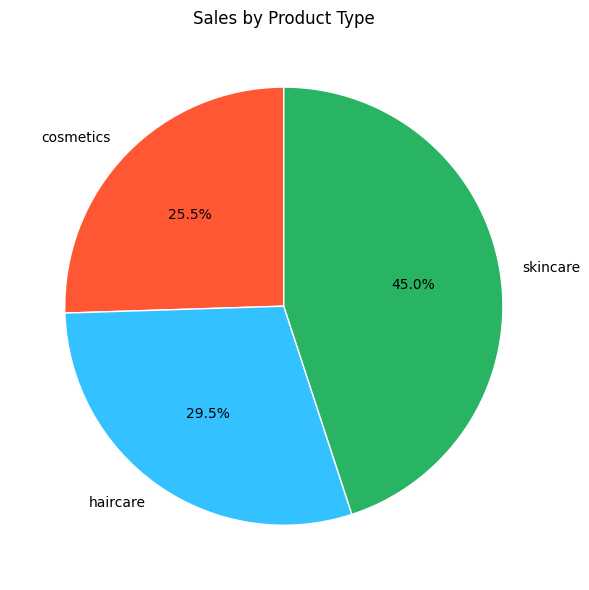

In [8]:
import matplotlib.pyplot as plt

# Aggregate sales by product type
sales_summary = sales_data.groupby("Product type")["Number of products sold"].sum()

bold_colors = ["#FF5733", "#33C1FF", "#28B463", "#AF7AC5", "#F4D03F", "#E67E22"]
# Pie chart
plt.figure(figsize=(8, 6))
plt.pie(
    sales_summary,
    labels=sales_summary.index,
    autopct="%1.1f%%",
    startangle=90,
    colors=bold_colors[:len(sales_summary)],
    wedgeprops={"edgecolor": "white"}
)


plt.title("Sales by Product Type")
plt.tight_layout()
plt.show()


In [9]:
#Analyze the Revenue Generated by each SKU

total_revenue=df.groupby('Shipping carriers')['Revenue generated'].sum().reset_index()
total_revenue

,Shipping carriers,Revenue generated
0,Carrier A,142629.994607
1,Carrier B,250094.646988
2,Carrier C,184880.177143


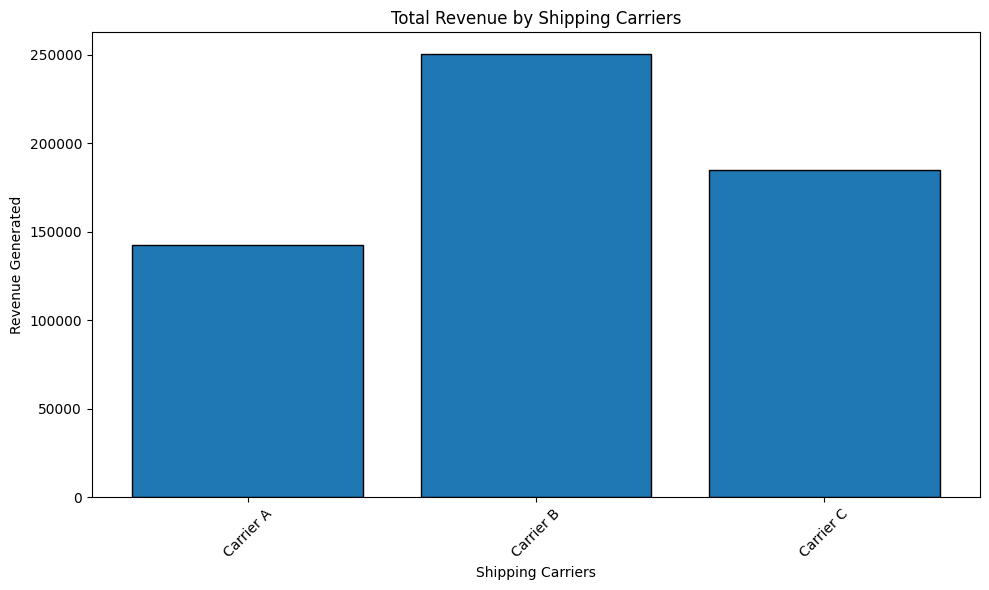

In [10]:
import matplotlib.pyplot as plt

# Bar chart: Total Revenue by Shipping Carriers
plt.figure(figsize=(10, 6))
plt.bar(
    total_revenue["Shipping carriers"],
    total_revenue["Revenue generated"],
    color="#1f77b4",  # Bold blue
    edgecolor="black"
)

# Labels and title
plt.title("Total Revenue by Shipping Carriers")
plt.xlabel("Shipping Carriers")
plt.ylabel("Revenue Generated")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


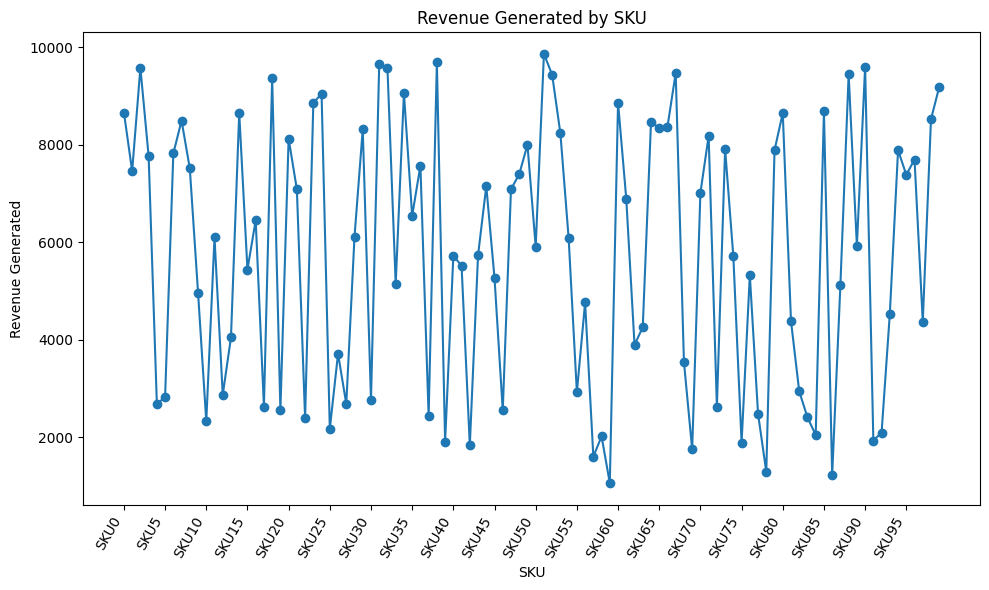

In [11]:
import matplotlib.pyplot as plt

# Line chart: Revenue by SKU
plt.figure(figsize=(10, 6))
plt.plot(
    df["SKU"],
    df["Revenue generated"],
    marker="o",
    linestyle="-",
    color="#1f77b4"
)

# 🧾 Labels and title
plt.title("Revenue Generated by SKU")
plt.xlabel("SKU")
plt.ylabel("Revenue Generated")
plt.xticks(rotation=60, ha="right")
plt.xticks(df["SKU"][::5])
plt.tight_layout()
plt.show()


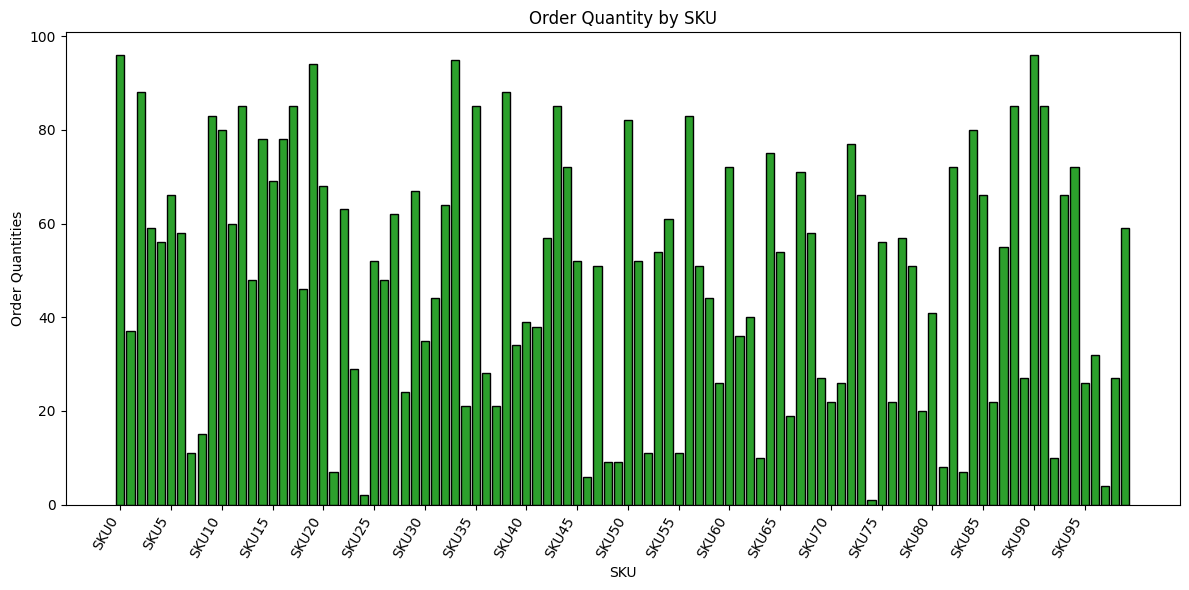

In [12]:
import matplotlib.pyplot as plt

# Bar chart: Order Quantity by SKU
plt.figure(figsize=(12, 6))
plt.bar(
    df["SKU"],
    df["Order quantities"],
    color="#2ca02c",  
    edgecolor="black"
)

# 🧾 Labels and title
plt.title("Order Quantity by SKU")
plt.xlabel("SKU")
plt.ylabel("Order Quantities")
plt.xticks(rotation=60, ha="right")  
plt.xticks(df["SKU"][::5])
plt.tight_layout()
plt.show()


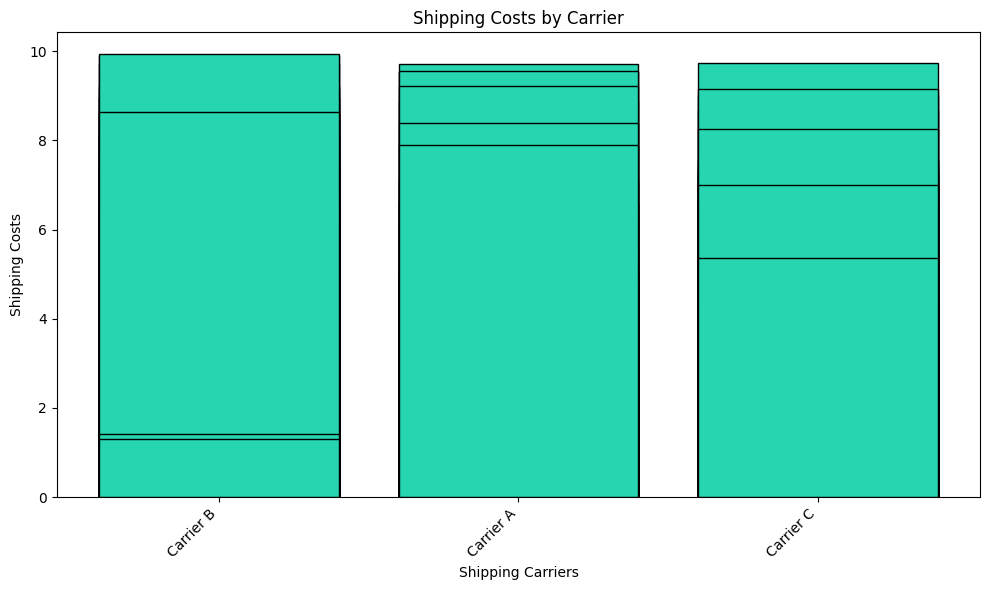

In [13]:
import matplotlib.pyplot as plt

#Bar chart: Shipping Costs by Carrier
plt.figure(figsize=(10, 6))
plt.bar(
    df["Shipping carriers"],
    df["Shipping costs"],
    color="#27d6b0",  
    edgecolor="black"
)

# 🧾 Labels and title
plt.title("Shipping Costs by Carrier")
plt.xlabel("Shipping Carriers")
plt.ylabel("Shipping Costs")
plt.xticks(rotation=45, ha="right") 
plt.tight_layout()
plt.show()


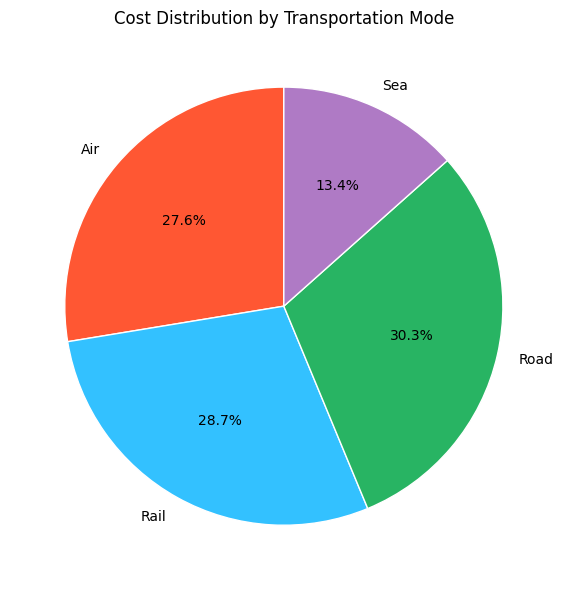

In [14]:
import matplotlib.pyplot as plt

#Aggregate costs by transportation mode
cost_summary = df.groupby("Transportation modes")["Costs"].sum()

#Bold color palette
bold_colors = ["#FF5733", "#33C1FF", "#28B463", "#AF7AC5", "#F4D03F", "#E67E22"]

#Pie chart
plt.figure(figsize=(8, 6))
plt.pie(
    cost_summary,
    labels=cost_summary.index,
    autopct="%1.1f%%",
    startangle=90,
    colors=bold_colors[:len(cost_summary)],
    wedgeprops={"edgecolor": "white"}
)

plt.title("Cost Distribution by Transportation Mode")
plt.tight_layout()
plt.show()


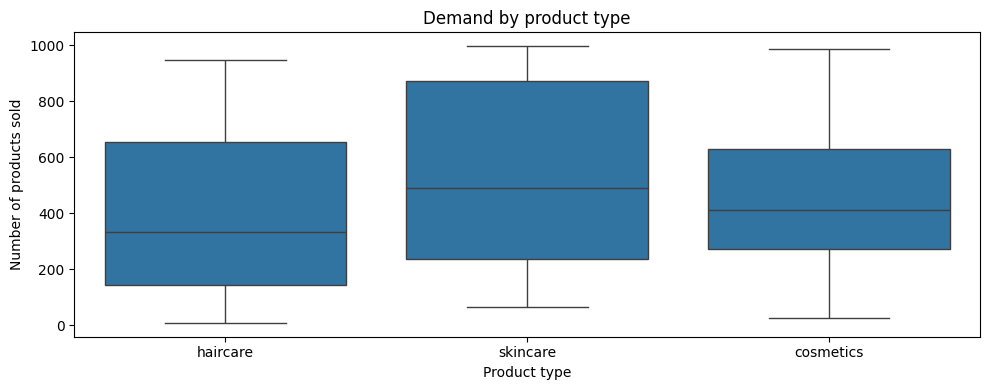

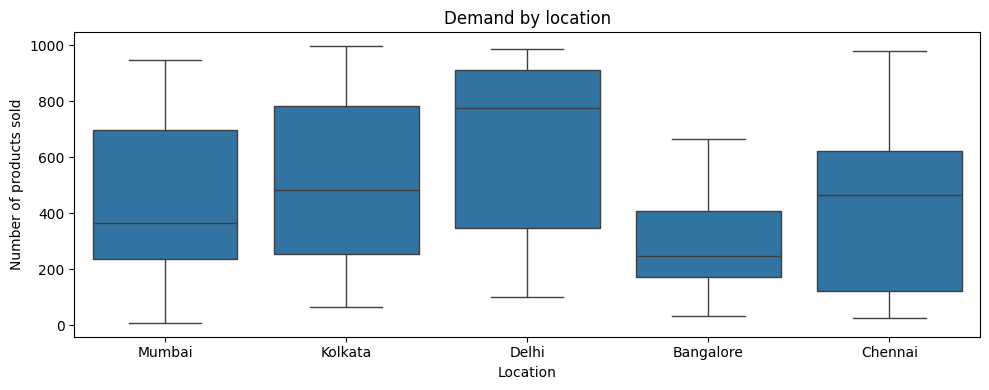

In [15]:
df.columns = df.columns.str.strip()

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,4))
sns.boxplot(
    data=df,
    x="Product type",               
    y="Number of products sold"
)
plt.title("Demand by product type")
plt.tight_layout()

plt.figure(figsize=(10,4))
sns.boxplot(
    data=df,
    x="Location",
    y="Number of products sold"    
)
plt.title("Demand by location")
plt.tight_layout()


In [16]:
df.columns

Index(['Product type', 'SKU', 'Price', 'Availability',
       'Number of products sold', 'Revenue generated', 'Customer demographics',
       'Stock levels', 'Lead times', 'Order quantities', 'Shipping times',
       'Shipping carriers', 'Shipping costs', 'Supplier name', 'Location',
       'Lead time', 'Production volumes', 'Manufacturing lead time',
       'Manufacturing costs', 'Inspection results', 'Defect rates',
       'Transportation modes', 'Routes', 'Costs'],
      dtype='object')

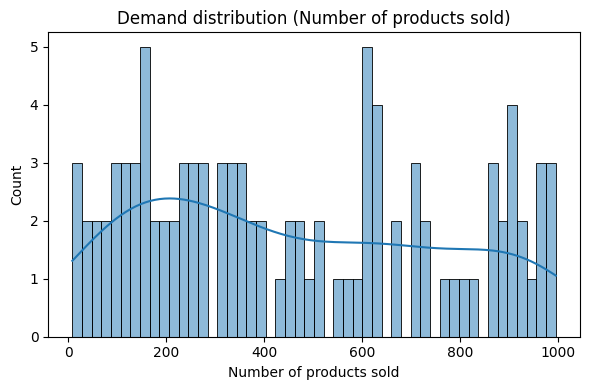

In [17]:
# Target distribution
plt.figure(figsize=(6,4))
sns.histplot(df['Number of products sold'], bins=50, kde=True)
plt.title("Demand distribution (Number of products sold)")
plt.tight_layout()


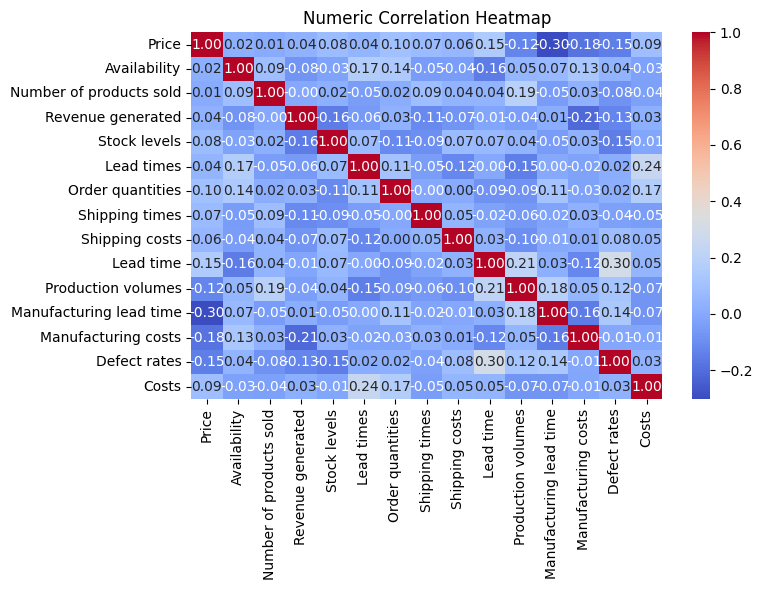

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute corr on numeric columns only
corr = df.corr(numeric_only=True)

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Numeric Correlation Heatmap")
plt.tight_layout()
plt.show()


In [19]:
#The heatmap confirms that your primary demand-driving variables are Price, Availability/Stock and Lead time, which will be critical features in your forecasting model.

In [20]:
# Select features and target
features = [
    "Price", "Availability", "Order quantities", "Stock levels",
    "Lead times", "Shipping costs", "Production volumes",
    "Manufacturing costs", "Defect rates"
]
target = "Number of products sold"

# Prepare X and y
X = df[features]
y = df[target]

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [21]:
#model training
from sklearn.ensemble import RandomForestRegressor

# Initialize and train model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [22]:
#Model evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predict
y_pred = model.predict(X_test)

# Evaluate
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


MAE: 310.46
RMSE: 354.84
R² Score: -0.32


In [23]:
#Model deployment
import joblib

# Save model
joblib.dump(model, "supply_chain_sales_model.pkl")

# Load model
loaded_model = joblib.load("supply_chain_sales_model.pkl")

# Predict with loaded model
new_predictions = loaded_model.predict(X_test)


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_4344\3294708367.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=feature_names, palette="viridis")


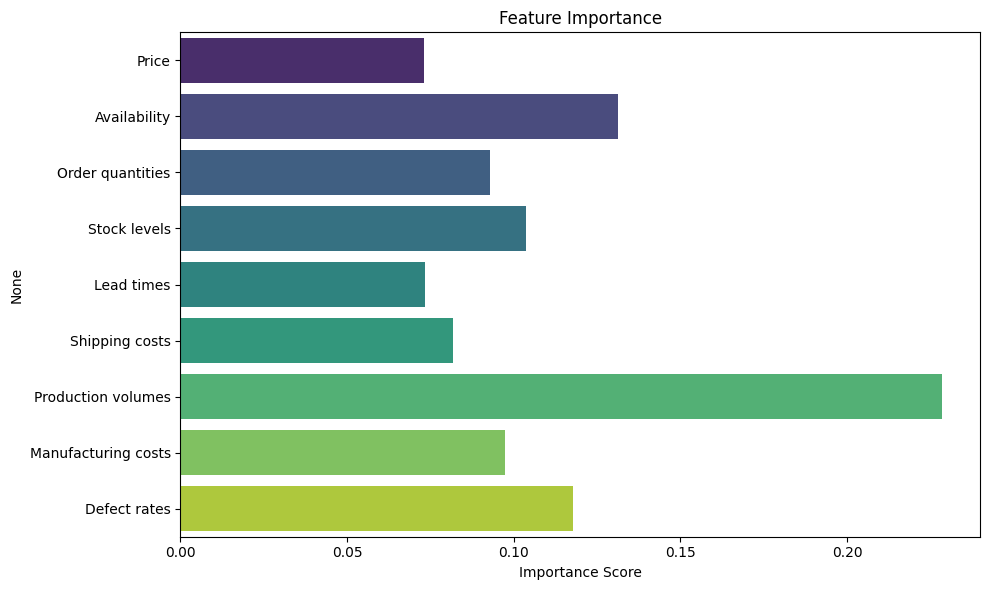

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Feature importance
importances = model.feature_importances_
feature_names = X.columns

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=feature_names, palette="viridis")
plt.title("Feature Importance")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()
